# Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

# Memanggil Dataset


In [5]:
df = pd.read_csv ('Student_Performance.csv')

# Deskripsi

In [1]:
df.head ()

NameError: name 'df' is not defined

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# Mencari Missing Data

<Axes: >

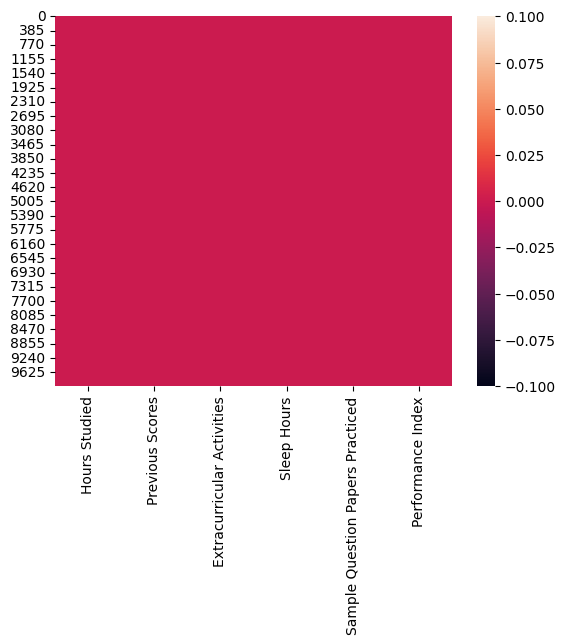

In [8]:
sns.heatmap(df.isnull())

# Nilai Rata-rata dari Dataset

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Visualisasi Data

<ipython-input-11-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

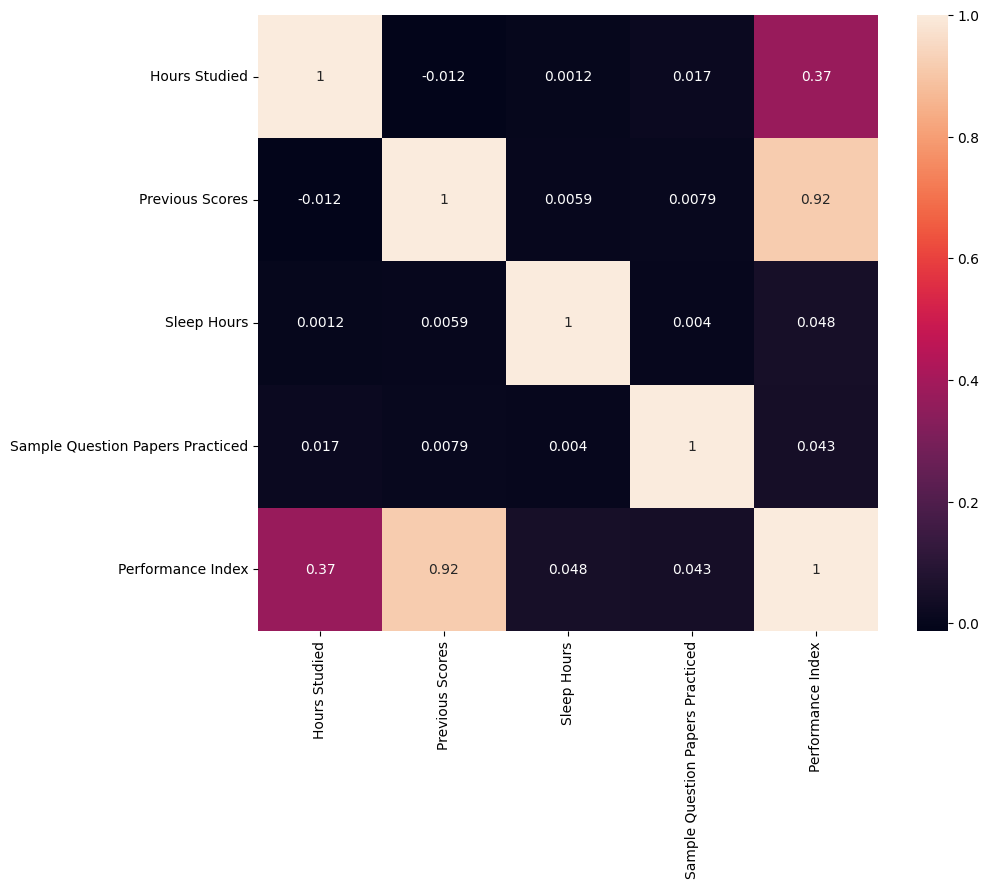

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

 # Hubungan antara jam belajar dan kinerja siswa

Korelasinya : 0.3737303506987236


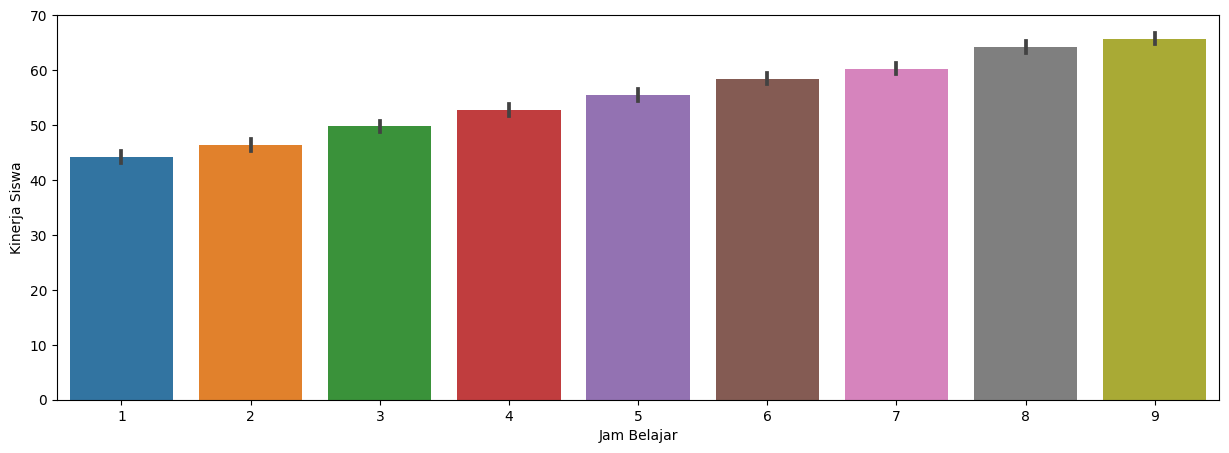

In [24]:
corr = df["Hours Studied"].corr(df["Performance Index"])
print("Korelasinya :", corr)
plt.figure(figsize=(15,5))
sns.barplot(x="Hours Studied", y="Performance Index", data=df)
plt.xlabel("Jam Belajar")
plt.ylabel("Kinerja Siswa")
plt.show()

 # Hubungan antara jumlah soal latihan dan kinerja siswa

Korelasinya : 0.04326832665907977


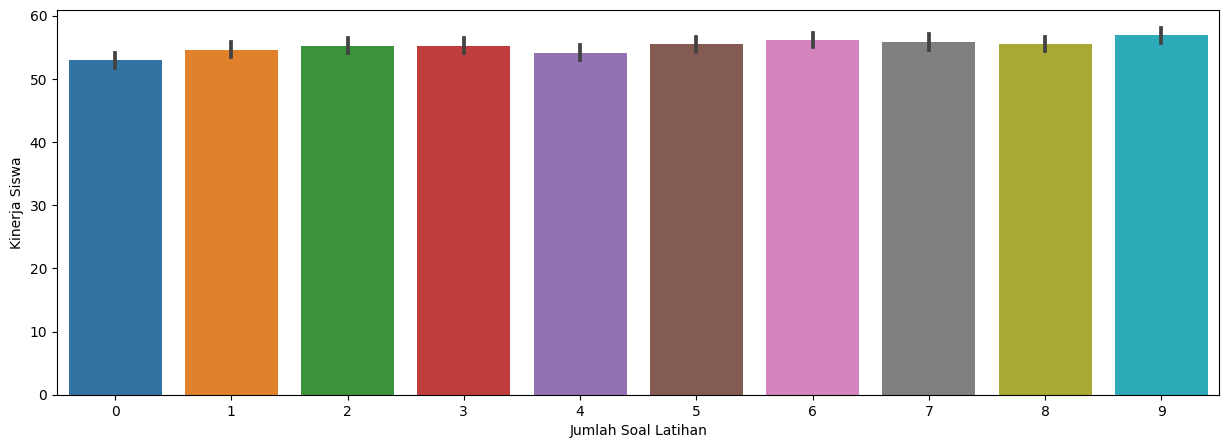

In [25]:
corr = df["Sample Question Papers Practiced"].corr(df["Performance Index"])
print("Korelasinya :", corr)
plt.figure(figsize=(15,5))
sns.barplot(x="Sample Question Papers Practiced", y="Performance Index", data=df)
plt.xlabel("Jumlah Soal Latihan")
plt.ylabel("Kinerja Siswa")
plt.show()

# Seleksi Fitur

In [30]:
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
x = df[features]
y = df['Performance Index']
x.shape, y.shape

((10000, 4), (10000,))

# Split Data Training dan Data Testing

In [35]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(2500,)

# Membuat Model Regresi Linier

In [39]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [40]:
score = lr.score(X_test, y_test)
print('Akurasi model regresi linier = ', score)

Akurasi model regresi linier =  0.9882768437891191


# Membuat Inputan Model Regresi Linier

In [44]:
#Jam Belajar = 5, Nilai Sebelumnya = 75, Jam Tidur = 7, Jumlah Soal Latihan = 3
input_data = np.array([[3, 60, 8, 5]])

prediction = lr.predict(input_data)
print('Kinerja Siswa : ', prediction)

Kinerja Siswa :  [40.68948521]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [46]:
filename = 'estimasi_kinerja_siswa.sav'
pickle.dump(lr, open(filename,'wb'))